<a href="https://colab.research.google.com/github/rkrymer/data_analysis_portfolio/blob/master/us_census_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning US Census Data

The goal of this portfolio project is to demonstrate my proficiency with the Python data analysis library [Pandas](https://pandas.pydata.org/) by processing and cleaning a subset of US census data, preparing it for further analysis. The data set was acquired through a Codecademy data science [course](https://join.codecademy.com/learn/paths/data-analyst-b/) and is meant only for educational/demonstration purposes.

In [ ]:
# Install s3fs library to access data stored in AWS S3 bucket
%%capture
%pip install s3fs

In [ ]:
# Import Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import s3fs

## Import and Inspect the Data

In [ ]:
# Import each of the 10 CSV files from S3
df_list = []
for i in range(10):
    filename = 's3://rk-dev-portfolio/states' + str(i) + '.csv'
    print(filename)
    df = pd.read_csv(filename)
    df_list.append(df)

# Combine all data into a single data frame
census_data = pd.concat(df_list)

s3://rk-dev-portfolio/states0.csv
s3://rk-dev-portfolio/states1.csv
s3://rk-dev-portfolio/states2.csv
s3://rk-dev-portfolio/states3.csv
s3://rk-dev-portfolio/states4.csv
s3://rk-dev-portfolio/states5.csv
s3://rk-dev-portfolio/states6.csv
s3://rk-dev-portfolio/states7.csv
s3://rk-dev-portfolio/states8.csv
s3://rk-dev-portfolio/states9.csv


Upon initial inspection of the imported data, a few oddities stick out:

*   `Unnamed: 0` is not a useful column name and may be a droppable index column
*   `Pacific` seems to be missing 5 data points compared to the other columns
*   `Income` is not a numeric type as I would expect it to be
*   `GenderPop` is ambiguous, this data should be inspected more closely to determine next steps
*   There are 60 rows of data but only 50 states. Why?



In [ ]:
# Inspect column names, data types, and missing data
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


Viewing a few rows of the data frame gives further clues about what processing needs to be done:

1.   Drop `Unnamed: 0` columns
2.   Drop any duplicate rows
3.   Split `GenderPop` into two separate numerical columns for male and female population
4.   Convert `Income` into numeric type, dropping dollar sign and commas
5.   Convert race columns into numeric types, dropping percent signs
6.   Determine how best to fill the null data points in `Pacific` so we are not missing any data



In [ ]:
# View first few rows of data
census_data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [ ]:
# Remove old unnamed index column
census_data = census_data.drop(columns='Unnamed: 0', errors='ignore')
# Drop duplicate rows
census_data = census_data.drop_duplicates()
# Create new unique index, discarding old index from CSV files
census_data = census_data.reset_index(drop=True)

census_data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


##### *Where is Wyoming?*
Turns out we have data for 49 states plus Puerto Rico and the District of Columbia, for a total of 51 rows of data. There is no data listed for Wyoming. In the real world I would definitely go seek out that missing Wyoming census data, assuming it must be a mistake, but for the sake of this project I am going to let it slide. Sorry, Wyomingites!

In [ ]:
# Check to see if we have 50 states now
census_data.State

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

## Household Income by Female Population
In order to plot household income against female population, we first need to fix the Income and GenderPop columns.

In [ ]:
# Convert Income column to numeric (float)
census_data.Income = census_data.Income.replace('\$', '', regex=True)
census_data.Income = census_data.Income.replace(',', '', regex=True)
census_data.Income = pd.to_numeric(census_data.Income)

In [ ]:
# Split GenderPop data
genderpop_split = census_data.GenderPop.str.split('_')

# Create separate male and female population count columns
census_data['PopMale'] = pd.to_numeric(genderpop_split.str.get(0).replace('M', '', regex=True))
census_data['PopFemale'] = pd.to_numeric(genderpop_split.str.get(1).replace('F', '', regex=True))

# Drop old column
census_data = census_data.drop(columns='GenderPop', errors='ignore')

census_data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329.0


In [ ]:
# Inspect data in new columns
census_data.PopMale.info()
print()
census_data.PopFemale.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51 entries, 0 to 50
Series name: PopMale
Non-Null Count  Dtype
--------------  -----
51 non-null     int64
dtypes: int64(1)
memory usage: 536.0 bytes

<class 'pandas.core.series.Series'>
RangeIndex: 51 entries, 0 to 50
Series name: PopFemale
Non-Null Count  Dtype  
--------------  -----  
49 non-null     float64
dtypes: float64(1)
memory usage: 536.0 bytes


The `PopFemale` column is missing a few values. We should be able to fill them in fairly accurately since we have complete data for `TotalPop` and `PopMale`. This data set (incorrectly) fails to include gender designations other than male or female, so for our purposes the missing data can be calculated by simple subtraction.

In [ ]:
# Fill null PopFemale counts with calculated estimate using TotalPop and PopMale
census_data.PopFemale = census_data.PopFemale.fillna(census_data.TotalPop - census_data.PopMale)

# Convert both male and female population columns to integer instead of float
census_data.PopFemale = census_data.PopFemale.astype(int)
census_data.PopMale = census_data.PopMale.astype(int)
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     object 
 3   White      51 non-null     object 
 4   Black      51 non-null     object 
 5   Native     51 non-null     object 
 6   Asian      51 non-null     object 
 7   Pacific    47 non-null     object 
 8   Income     51 non-null     float64
 9   PopMale    51 non-null     int64  
 10  PopFemale  51 non-null     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 4.5+ KB


We should now have all the data we need to make the desired scatter plot.

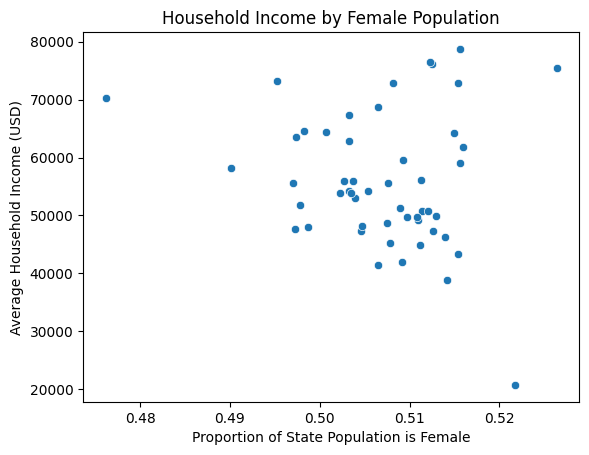

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate female population proportion for plotting
f_proportion = census_data.PopFemale / census_data.TotalPop

# Plot data
sns.scatterplot(x=f_proportion, y=census_data.Income)
plt.title('Household Income by Female Population')
plt.xlabel('Proportion of State Population is Female')
plt.ylabel('Average Household Income (USD)')
plt.show()
plt.clf()

## Histogram of Population by Race
If we want to be able to visualize the racial population data with a histogram (or any other graph), it too needs to be converted to a numeric data type. We should also fill any missing data with appropriate values in order to make sure our charts are as accurate as possible.

In [ ]:
# Create list of columns we want to manipulate
race_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# Convert race data columns to numeric (float) proportions
for col_name in race_cols:
    census_data[col_name] = census_data[col_name].replace('%', '', regex=True)
    census_data[col_name] = pd.to_numeric(census_data[col_name])

census_data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [ ]:
# Fill null values in Pacific column with average of all other states
avg_pacific = census_data.Pacific.mean()
census_data.Pacific = census_data.Pacific.fillna(avg_pacific)

##### *Histogram-o-rama!*
Scroll for a whole bunch of histograms showing population distribution by race.



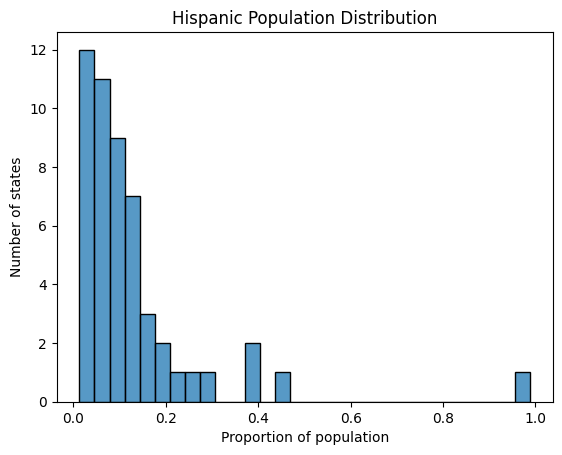

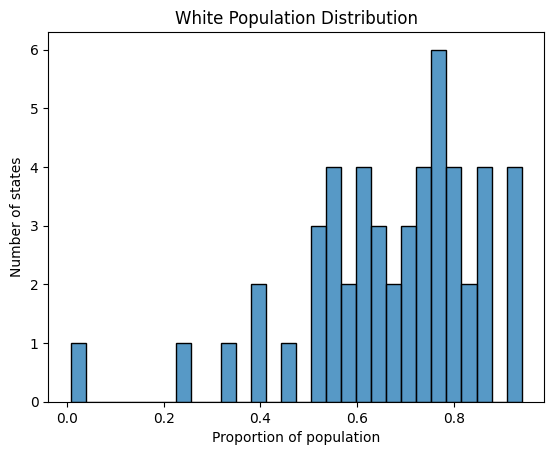

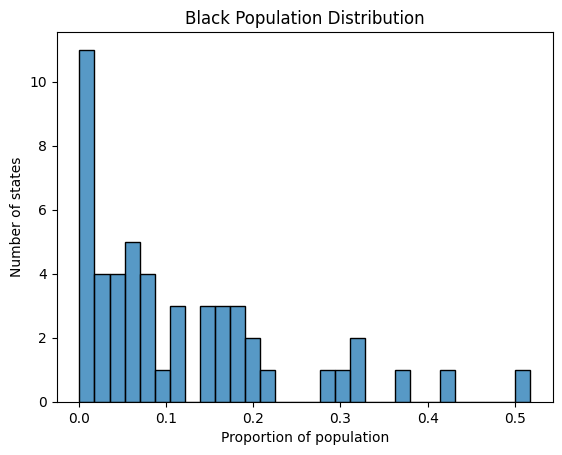

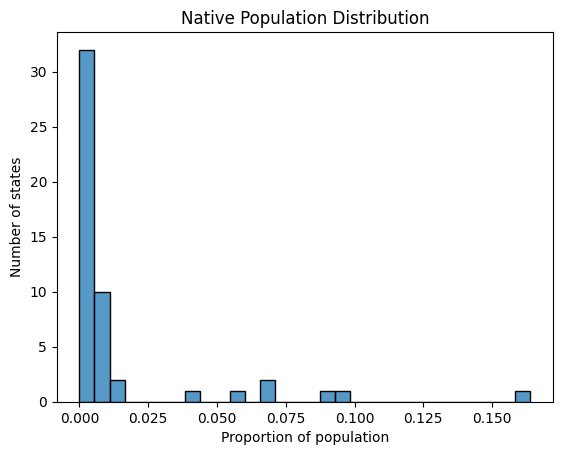

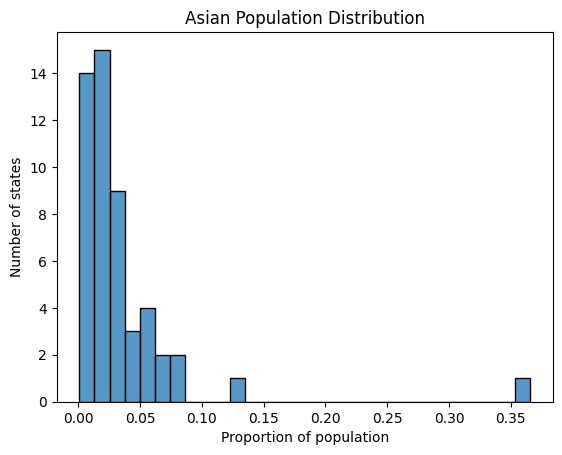

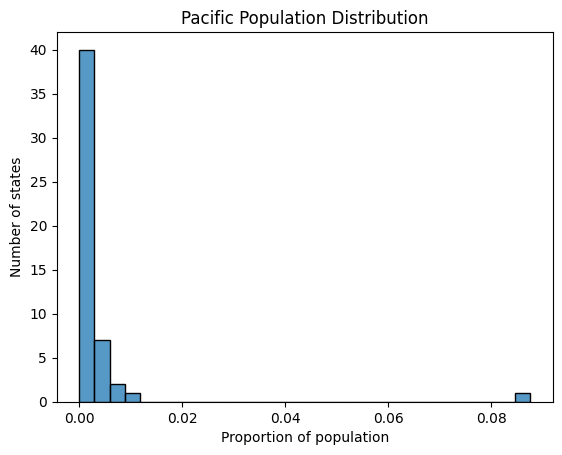

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot all of the data
for col_name in race_cols:
    proportional_data = census_data[col_name] / 100
    sns.histplot(proportional_data, bins=30)
    plt.title(col_name + ' Population Distribution')
    plt.xlabel('Proportion of population')
    plt.ylabel('Number of states')
    plt.show()
    plt.clf()